<a href="https://colab.research.google.com/github/palexey2006/Ml-Engineering/blob/main/CNN_models/LeNet_KMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

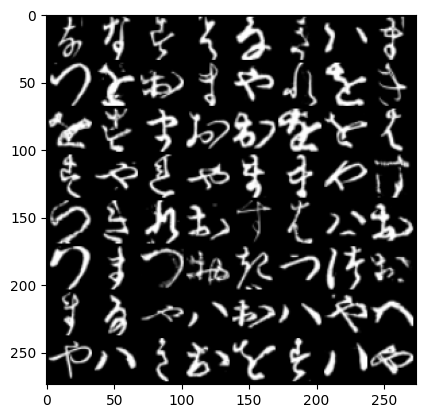

Training started
Epoch [1/15], Step [312/938], Loss: 0.2714
Epoch [1/15], Step [624/938], Loss: 0.3539
Epoch [1/15], Step [936/938], Loss: 0.1762
Epoch [2/15], Step [312/938], Loss: 0.1724
Epoch [2/15], Step [624/938], Loss: 0.0594
Epoch [2/15], Step [936/938], Loss: 0.0719
Epoch [3/15], Step [312/938], Loss: 0.1006
Epoch [3/15], Step [624/938], Loss: 0.0547
Epoch [3/15], Step [936/938], Loss: 0.1031
Epoch [4/15], Step [312/938], Loss: 0.1434
Epoch [4/15], Step [624/938], Loss: 0.0165
Epoch [4/15], Step [936/938], Loss: 0.1335
Epoch [5/15], Step [312/938], Loss: 0.1028
Epoch [5/15], Step [624/938], Loss: 0.1388
Epoch [5/15], Step [936/938], Loss: 0.0366
Epoch [6/15], Step [312/938], Loss: 0.1023
Epoch [6/15], Step [624/938], Loss: 0.1297
Epoch [6/15], Step [936/938], Loss: 0.0161
Epoch [7/15], Step [312/938], Loss: 0.0440
Epoch [7/15], Step [624/938], Loss: 0.0654
Epoch [7/15], Step [936/938], Loss: 0.0046
Epoch [8/15], Step [312/938], Loss: 0.0307
Epoch [8/15], Step [624/938], Loss: 0

In [32]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
'''
LeNet scructure:
input 32x32x1
1)conv2d with kernel size=5 with output size=6
current size is 28x28
2)AvgPool2d with kernel size=2 and stride=2
current size is 14x14
3) conv2d with kernel size=5 and output size = 16

4) AVGpool with same params
5) conv2d with kernel size=5 and output size=120
6) linear1 input 120 output 84
7) linear2 input 84 output num_classes
'''
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.relu = nn.ReLU()
        self.pool = nn.AvgPool2d(kernel_size=(2,2), stride=(2,2), padding=(0,0))
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=(5,5), stride=(1,1), padding=(0,0))
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=(5,5), stride=(1,1), padding=(0,0))
        self.conv3 = nn.Conv2d(in_channels=16, out_channels=120, kernel_size=(5,5), stride=(1,1), padding=(0,0))
        self.linear1 = nn.Linear(in_features=120, out_features=84)
        self.linear2 = nn.Linear(in_features=84, out_features=10)
    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.pool(x)
        x = self.relu(self.conv2(x))
        x = self.pool(x)
        x = self.relu(self.conv3(x))
        x = torch.flatten(x, 1)
        x = self.relu(self.linear1(x))
        x = self.linear2(x)
        return x

def imshow(img):
    npimg = img.numpy()
    transposed = np.transpose(npimg, (1,2,0))
    plt.imshow(transposed, cmap='gray')
    plt.show()


model = LeNet()
learning_rate = 0.001
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
epochs = 15
batch_size = 64
transform = transforms.Compose([transforms.Resize((32,32)),transforms.ToTensor(),transforms.Normalize((0.5),(0.5))])

trainset = torchvision.datasets.KMNIST(root='./data', train=True, download=True, transform=transform)

testset = torchvision.datasets.KMNIST(root='./data', train=False, download=True, transform=transform)


trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)

testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=True)


#showing images
image_transform = transforms.Compose([transforms.Grayscale(num_output_channels=3),transforms.Resize((32,32)),transforms.ToTensor()])
imageset = torchvision.datasets.KMNIST(root='./data', train=True, download=False, transform=image_transform)
imageloader = torch.utils.data.DataLoader(imageset, batch_size=64, shuffle=True)
dataiter = iter(imageloader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))


print('Training started')

for epoch in range(epochs):

    for step,(images, labels) in enumerate(trainloader):
        outputs = model(images)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if (step+1) % 312 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Step [{step+1}/{len(trainloader)}], Loss: {loss.item():.4f}')
print('Training finished')

with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in testloader:
        outputs = model(images)
        total += labels.size(0)
        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted == labels).sum().item()

    accuracy = correct / total * 100.0
    print(f'Accuracy of LeNet model that trained on KMNIST dataset is: {accuracy}%')

torch.save(model.state_dict(), 'LeNet_model.pth')